# Clusterização K-means com Scikit-learn

# 1. Introdução

A clusterização é uma das técnicas mais utilizadas para análise exploratória de dados. Seu objetivo é dividir os pontos de dados em vários grupos, de modo que os pontos no mesmo grupo sejam semelhantes e os pontos em grupos diferentes sejam diferentes uns dos outros.

Clusterização K-means é um dos algoritmos de aprendizado de máquina não supervisionados mais utilizados que forma grupos de dados com base na similaridade entre instâncias de dados. Para que esse algoritmo específico funcione, o número de clusters deve ser definido antecipadamente. O $K$ no K-means refere-se ao número de clusters.

O algoritmo K-means começa escolhendo aleatoriamente um valor centróide para cada cluster. Depois disso, o algoritmo executa iterativamente três etapas: 

1. Encontra a distância euclidiana entre cada instância de dados e os centróides de todos os clusters; 
2. Atribuir as instâncias de dados ao cluster do centróide com a distância mais próxima; 
3. Calcular novos valores centróides com base nos valores médios das coordenadas de todas as instâncias de dados do cluster correspondente.

# 2. Um Exemplo Simples

Vamos tentar ver como o algoritmo K-means funciona com a ajuda de um exemplo simples, antes de implementar o algoritmo no Scikit-Learn. São necessárias três linhas de código para implementar o algoritmo de clusterização K-means no Scikit-Learn. No entanto, para entender como ele realmente funciona, vamos primeiro resolver um problema de cluster usando o K-means “no papel”.

Suponha que tenhamos um conjunto das seguintes instâncias de dados bidimensionais denominadas $D$.

```
D = {(5,3), (10,15), (15,12), (24,10), (30,45), (85,70), (71,80), (60,78), (55,52), (80,91)} 
```

Queremos dividir esses dados em dois clusters, $C_1$ e $C_2$, com base na semelhança entre os pontos de dados.

O primeiro passo é inicializar aleatoriamente os valores para os centróides de ambos os clusters. Vamos chamar os centróides dos clusters $C_1$ e $C_2$ de `c1` e `c2`, respectivamente, e inicializá-los com os valores dos dois primeiros pontos de dados, ou seja, `(5, 3)` e `(10, 15)`.

Agora temos que começar as iterações.


**Iteração 1.**

|  # | Instância | Distancia de c1 = (5,3) | Distancia de c2 = (10,15) | Cluster Atribuído |
|----|-----------|-------------------------|---------------------------|-------------------|
|  1 | (5,3)     |                       0 |                        13 | $C_1$             |
|  2 | (10,15)   |                      13 |                         0 | $C_2$             |
|  3 | (15,12)   |                   13.45 |                      5.83 | $C_2$             |
|  4 | (24,10)   |                   20.24 |                     14.86 | $C_2$             |
|  5 | (30,45)   |                   48.87 |                        36 | $C_2$             |
|  6 | (85,70)   |                  104.35 |                        93 | $C_2$             |
|  7 | (71,80)   |                  101.41 |                        89 | $C_2$             |
|  8 | (60,78)   |                      93 |                        80 | $C_2$             |
|  9 | (55,52)   |                      70 |                        58 | $C_2$             |
| 10 | (80,91)   |                  115.52 |                    103.32 | $C_2$             |


Na tabela acima, a segunda coluna contém todos os pontos de dados. A terceira coluna contém a distância euclidiana entre todos os pontos de dados e o centróide `c1`. Da mesma forma, a quarta coluna contém a distância entre o centróide `c2` e os pontos de dados. Finalmente, na quinta coluna, mostramos a qual cluster o ponto de dados é atribuído com base na distância euclidiana entre os dois centróides de cluster. Por exemplo, observe o terceiro ponto de dados `(15, 12)`. Tem uma distância de `13,45` unidades de `c1`, enquanto uma distância de `5,83` unidades de `c2`; portanto, foi agrupado em $C_2$.

Depois de atribuir os pontos de dados aos clusters correspondentes, o próximo passo é calcular os novos valores do centróide. Esses valores são calculados encontrando os meios das coordenadas dos pontos de dados que pertencem a um cluster específico.

Para o cluster $C_1$, existe atualmente apenas um ponto, ou seja, `(5,3)`, portanto, a média das coordenadas permanece igual e o novo valor centróide para `c1` também será `(5,3)`.

Para $C_2$, existem atualmente 9 pontos de dados. Nomeamos as coordenadas dos pontos de dados como $x$ e $y$. O novo valor da coordenada $x$ do centróide `c2` pode ser calculado determinando a média das coordenadas $x$ de todos os 9 pontos que pertencem ao cluster $C_2$, conforme abaixo:

```
c2(x) = (10 + 15 + 24 + 30 + 85 + 71 + 60 + 55 + 80) / 9 = 47.77
```

O novo valor para a coordenada $y$ do centróide `c2` pode ser calculado determinando a média de todas as coordenadas $y$ de todos os 9 pontos que pertencem ao cluster $C_2$.

```
c2(y) = (15 + 12 + 10 + 45 + 70 + 80 + 78 + 52 + 91) / 9 = 50.33
```

Portanto, o valor atualizado do centróide para `c2` agora será `(47.77, 50.33)`.

Para a próxima iteração, os novos valores do centróide para `c1` e `c2` serão usados e todo o processo será repetido. As iterações continuam até que os valores do centróide parem de ser atualizados. As próximas iterações são as seguintes:


**Iteração 2.**

|  # | Instância | Distancia de c1 = (5,3) | Distancia de c2 = (10,15) | Cluster Atribuído |
|----|-----------|-------------------------|---------------------------|-------------------|
|  1 | (5,3)     |                       0 |                     63.79 | $C_1$             |
|  2 | (10,15)   |                      13 |                     51.71 | $C_1$             |
|  3 | (15,12)   |                   13.45 |                     50.42 | $C_1$             |
|  4 | (24,10)   |                   20.24 |                     46.81 | $C_1$             |
|  5 | (30,45)   |                   48.87 |                     18.55 | $C_2$             |
|  6 | (85,70)   |                  104.35 |                     42.10 | $C_2$             |
|  7 | (71,80)   |                  101.41 |                     37.68 | $C_2$             |
|  8 | (60,78)   |                      93 |                     30.25 | $C_2$             |
|  9 | (55,52)   |                      70 |                      7.42 | $C_2$             |
| 10 | (80,91)   |                  115.52 |                     51.89 | $C_2$             |


```
c1(x) = (5, 10, 15, 24) / 4 = 13.5  
c1(y) = (3, 15, 12, 10) / 4 = 10.0  
```

Valor atualizado de `c1` passa a ser `(13.5, 10.0)`.

```
c2(x) = (30 + 85 + 71 + 60 + 55 + 80) / 6 = 63.5  
c2(y) = (45 + 70 + 80 + 78 + 52 +91) / 6 = 69.33  
```

Valor atualizado de `c2` passa a ser `(63.5, 69.33)`.


**Iteração 3.**

|  # | Instância | Distancia de c1 = (5,3) | Distancia de c2 = (10,15) | Cluster Atribuído |
|----|-----------|-------------------------|---------------------------|-------------------|
|  1 | (5,3)     |                   11.01 |                     88.44 | $C_1$             |
|  2 | (10,15)   |                    6.10 |                     76.24 | $C_1$             |
|  3 | (15,12)   |                     2.5 |                     75.09 | $C_1$             |
|  4 | (24,10)   |                    10.5 |                     71.27 | $C_1$             |
|  5 | (30,45)   |                   38.69 |                     41.40 | $C_1$             |
|  6 | (85,70)   |                   93.33 |                     21.51 | $C_2$             |
|  7 | (71,80)   |                   90.58 |                     13.04 | $C_2$             |
|  8 | (60,78)   |                   82.37 |                      9.34 | $C_2$             |
|  9 | (55,52)   |                   59.04 |                     19.30 | $C_2$             |
| 10 | (80,91)   |                  104.80 |                     27.23 | $C_2$             |

```
c1(x) = (5, 10, 15, 24, 30) / 5 = 16.8  
c1(y) = (3, 15, 12, 10, 45) / 5 = 17.0  
```

Valor atualizado de `c1` é `(16.8, 17.0)`.

```
c2(x) = (85 + 71 + 60 + 55 + 80) / 5 = 70.2  
c2(y) = (70 + 80 + 78 + 52 + 91) / 5 = 74.2  
```

Valor atualizado de `c2` é `(70.2, 74.2)`.


**Iteração 4.**

|  # | Instância | Distancia de c1 = (5,3) | Distancia de c2 = (10,15) | Cluster Atribuído |
|----|-----------|-------------------------|---------------------------|-------------------|
|  1 | (5,3)     |                   18.30 |                     96.54 | $C_1$             |
|  2 | (10,15)   |                    7.08 |                     84.43 | $C_1$             |
|  3 | (15,12)   |                    5.31 |                     83.16 | $C_1$             |
|  4 | (24,10)   |                   10.04 |                     79.09 | $C_1$             |
|  5 | (30,45)   |                   30.95 |                     49.68 | $C_1$             |
|  6 | (85,70)   |                   86.37 |                     15.38 | $C_2$             |
|  7 | (71,80)   |                   83.10 |                      5.85 | $C_2$             |
|  8 | (60,78)   |                   74.74 |                     10.88 | $C_2$             |
|  9 | (55,52)   |                   51.80 |                     26.90 | $C_2$             |
| 10 | (80,91)   |                   97.31 |                     19.44 | $C_2$             |

```
c1(x) = (5, 10, 15, 24, 30) / 5 = 16.8  
c1(y) = (3, 15, 12, 10, 45) / 5 = 17.0  
```

Valor atualizado de `c1` é `(16.8, 17.0)`.

```
c2(x) = (85 + 71 + 60 + 55 + 80) / 5 = 70.2  
c2(y) = (70 + 80 + 78 + 52 + 91) / 5 = 74.2  
```

Valor atualizado de `c2` é `(70.2, 74.2)`.

No final da quarta iteração, os valores atualizados de `c1` e `c2` são os mesmos do final da terceira iteração. Isso significa que os dados não podem ser clusterizados além deste ponto. Os pontos `c1` e `c2` são os centróides de $C_1$ e $C_2$. Para classificar um novo ponto de dados, a distância entre o ponto de dados e os centróides dos clusters é calculada. O ponto de dados é atribuído ao cluster cujo centróide está mais próximo do ponto de dados.


# 2. K-means com o Scikit-Learn

Agora que sabemos como o algoritmo de clusterização K-means realmente funciona, vamos ver como podemos implementá-lo com o Scikit-Learn.

Para executar o script a seguir, precisaremos das bibliotecas *matplotlib*, *numpy* e *scikit-learn*.

Vamos começar nosso script primeiro importando as bibliotecas necessárias:

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
from sklearn.cluster import KMeans

## 2. 1 Preparar os Dados

O próximo passo é preparar os dados que queremos agrupar. Vamos criar um array `numpy` de 10 linhas e 2 colunas. A linha contém os mesmos pontos de dados que usamos para o nosso exemplo manual de agrupamento K-means na última seção. Criamos uma matriz numpy de pontos de dados porque a biblioteca Scikit-Learn pode trabalhar com entradas de dados do tipo matricial numpy sem exigir qualquer pré-processamento.

In [0]:
X = np.array([[5,3],
              [10,15],
              [15,12],
              [24,10],
              [30,45],
              [85,70],
              [71,80],
              [60,78],
              [55,52],
              [80,91]])

## 2.2 Visualizar os Dados

Podemos ver que esses são os mesmos pontos de dados que usamos no exemplo anterior. Vamos traçar esses pontos e verificar se podemos ver os clusters. Para fazer isso, execute a seguinte linha:

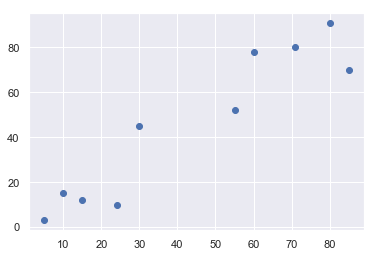

In [0]:
plt.scatter(X[:,0],X[:,1], label='Posição')
plt.show()

O código acima plota todos os valores na primeira coluna do array `X` em relação a todos os valores da segunda coluna.

A olho nu, se tivermos que formar dois clusters com os pontos de dados acima, provavelmente faremos um cluster de cinco pontos no canto inferior esquerdo e um cluster de cinco pontos no canto superior direito. Vamos ver se o nosso algoritmo de clusterização K-means faz o mesmo ou não.

## 2.3 Criar os Clusters

Para criar um cluster K-means com dois clusters, basta digitar o seguinte script:

In [0]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Sim, são apenas duas linhas de código. Na primeira linha, criamos um objeto KMeans e passamos 2 como valor para o parâmetro `n_clusters`. Em seguida, basta chamar o método `fit` em `kmeans` e passar os dados que deseja agrupar, que, nesse caso, é o array `X` que criamos anteriormente.

Agora vamos ver o que os valores dos centróides gerados pelo algoritmo para os clusters finais.

In [0]:
kmeans.cluster_centers_

array([[16.8, 17. ],
       [70.2, 74.2]])

O resultado é um array de 2 linhas por 2 colunas. A primeira linha contém valores para as coordenadas do primeiro centróide, isto é, `(16.8, 17)` e a segunda linha contém valores para as coordenadas do outro centróide, isto é, `(70.2, 74.2)`. Você pode ver que esses valores são semelhantes ao que calculamos manualmente para os centróides `c1` e `c2` na última seção. Em suma, nosso algoritmo funciona bem.

Para ver os rótulos para o ponto de dados, ou seja, para ver a qual cluster cada ponto de dados foi atribuído, execute o seguinte script.

In [0]:
kmeans.labels_

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1], dtype=int32)

Aqui os primeiros cinco pontos foram agrupados e os últimos cinco pontos foram agrupados. Note que 0 e 1 são usados apenas para representar os IDs de cluster e não têm significado matemático. Se houvesse três clusters, o terceiro cluster teria sido representado pelo dígito 2.

Vamos plotar os pontos de dados novamente no gráfico e visualizar como os dados foram agrupados. Desta vez, vamos plotar os dados junto com o rótulo atribuído para que possamos distinguir entre os clusters. Execute o seguinte script:

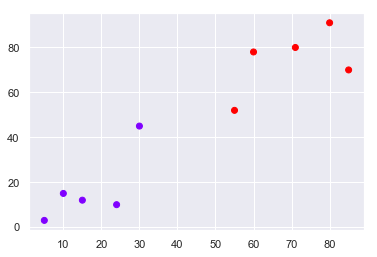

In [0]:
plt.scatter(X[:,0],X[:,1], c=kmeans.labels_, cmap='rainbow')  
plt.show()

Aqui estamos plotando a primeira coluna da matriz `X` em relação à segunda coluna, no entanto, neste caso, também estamos passando `kmeans.labels_` como valor para o parâmetro `c` que corresponde aos rótulos. O parâmetro `cmap = 'rainbow'` é passado para escolher o tipo de cor para os diferentes pontos de dados.

Como esperado, os primeiros cinco pontos no canto inferior esquerdo foram agrupados juntos, enquanto os pontos restantes no canto superior direito foram agrupados juntos.

Agora vamos executar o algoritmo K-means com três clusters e ver o gráfico de saída.

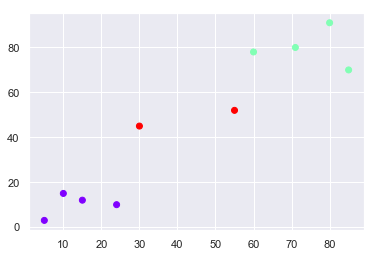

In [0]:
kmeans3 = KMeans(n_clusters=3)
kmeans3.fit(X)
plt.scatter(X[:,0], X[:,1], c=kmeans3.labels_, cmap='rainbow')
plt.show()

Podemos ver que, novamente, os pontos que estão próximos foram agrupados juntos.

Agora vamos plotar os pontos junto com as coordenadas centróides de cada cluster para ver como o posicionament dos centróides afeta o agrupamento. Mais uma vez, vamos usar três clusters para ver o efeito dos centróides. Execute o script abaixo para desenhar o gráfico. Os centróides serão plotados em preto.

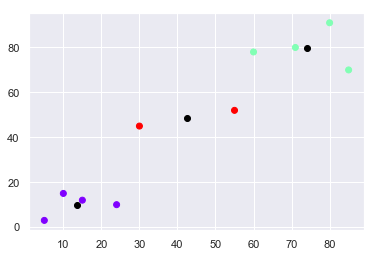

In [0]:
plt.scatter(X[:,0], X[:,1], c=kmeans3.labels_, cmap='rainbow')  
plt.scatter(kmeans3.cluster_centers_[:,0] ,kmeans3.cluster_centers_[:,1], color='black')  
plt.show()

No caso de três grupos, os dois pontos no meio têm uma distância mais próxima do centróide no meio, em comparação com os centróides no canto inferior esquerdo ou superior direito. No entanto, se houvesse dois clusters, não haveria um centróide no centro, portanto, os pontos mais centrais teriam que ser agrupados com os pontos nos clusters inferior esquerdo ou superior direito.

# 3. Limitação do K-means

Vamos gerar um conjunto de dados bidimensional contendo quatro blocos distintos.

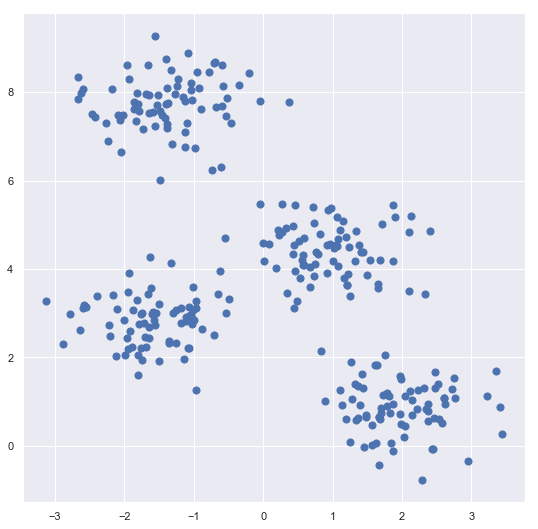

In [0]:
from sklearn.datasets.samples_generator import make_blobs

X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

plt.figure(figsize=(9,9))
plt.scatter(X[:, 0], X[:, 1], s=50);
plt.show()

Visualmente, é relativamente fácil reconhecer os quatro clusters. Novamente, vamos usar o K-means para realizar esta tarefa automaticamente. Em seguida, vamos visualizar os resultados, plotando os dados coloridos de acordo com os rótulos dos clusteres. Também plotaremos os centros dos clusteres.

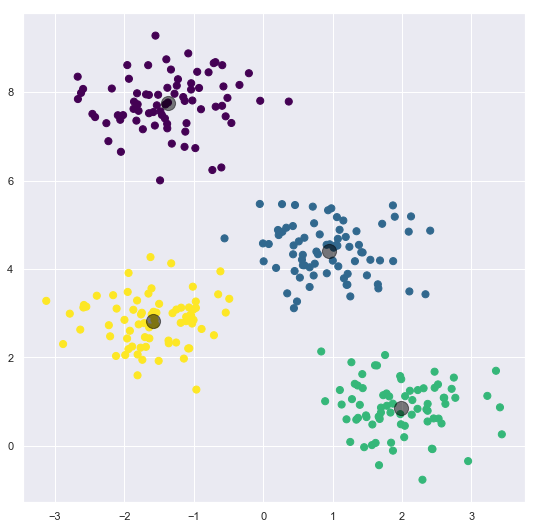

In [0]:
kmeans4 = KMeans(n_clusters=4)
kmeans4.fit(X)

plt.figure(figsize=(9,9))
plt.scatter(X[:, 0], X[:, 1], c=kmeans4.labels_, s=50, cmap='viridis')
centers = kmeans4.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.show()

## 3.1. Fronteiras Lineares

O algoritmo K-means funcionou muito bem no exemplo acima e nos anteriores pois é possível traçar uma linha reta que divide um cluster do outro.

O pressuposto fundamental do modelo de k-means, i.e., os pontos estarão mais próximos de seu próprio centro de cluster do que de outros, significa que o algoritmo muitas vezes será ineficiente se os clusters tiverem geometrias complicadas.

Em particular, os limites entre os clusters K-means sempre serão lineares, o que significa que falhará para limites mais complicados.

Considere os dados a seguir, junto com os rótulos de cluster encontrados pela abordagem típica de k-means.

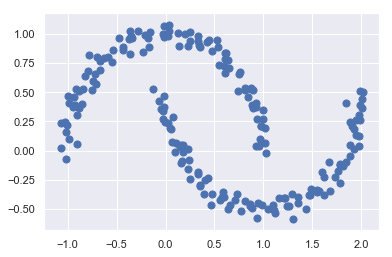

In [0]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)
plt.scatter(X[:,0], X[:,1], s=50)
plt.show()

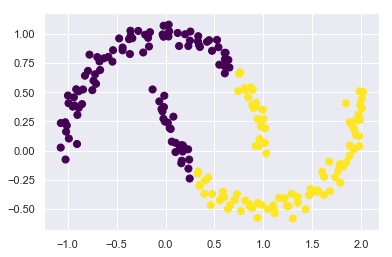

In [0]:
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');
plt.show()

Como se pode notar, embora a distinção entre os dois clusters seja bastante clara visualmente, o algoritmo K-means falhou em identificar os clusteres corretamente, pois estes clusteres não são linearmente separáveis.

## 3.2. O Método de Kernel

Entretanto, nem tudo está perdido. No aprendizado de máquina, os *métodos de kernel* são uma classe de algoritmos para análise de padrões, cujo membro mais conhecido é a *máquina de vetor de suporte* (SVM). A tarefa geral da análise de padrões é encontrar e estudar tipos gerais de relações (por exemplo, clusters, classificações, componentes principais, correlações, classificações) em conjuntos de dados. Em sua forma mais simples, o *truque do kernel* significa **transformar** dados em outra dimensão que tenha uma margem de divisão clara entre classes de dados. Para muitos algoritmos que resolvem essas tarefas, os dados na representação bruta devem ser explicitamente transformados em representações de vetores de características através de um **mapa de características** especificado pelo usuário: em contraste, os métodos do kernel requerem apenas um kernel especificado pelo usuário, ou seja, uma **função de similaridade** sobre pares de pontos de dados na representação bruta.

Os métodos do kernel devem seu nome ao uso de *funções do kernel*, que permitem que eles operem em um espaço de características implícito e de alta dimensão sem nunca computar as coordenadas dos dados naquele espaço, mas simplesmente computando os produtos internos entre as imagens de todos os pares de dados no espaço de recurso. Essa operação é frequentemente computacionalmente mais barata do que o cálculo explícito das coordenadas. Essa abordagem é chamada de “truque do kernel”. As funções do kernel foram introduzidas para dados de sequência, gráfos, texto, imagens e vetores.

Algoritmos capazes de operar com kernels incluem o *kernel perceptron*, *support vector machines* (SVM), processos Gaussian, *principal components analysis* (PCA), *análise de correlação canônica*, *regressão de crista*, *spectral clustering*, filtros adaptativos lineares e muitos outros. Qualquer modelo linear pode ser transformado em um modelo não linear aplicando o truque do kernel ao modelo: substituindo seus recursos (preditores) por uma função do kernel.

### 3.2.1. Motivação e Explicação Informal

Os métodos do kernel podem ser considerados como aprendizes baseados em instância: em vez de aprender alguns conjuntos fixos de parâmetros correspondentes às características de suas entradas, eles "se lembram" do i-ésimo exemplo de treinamento $(\mathbf{x}_i, y_i)$ e aprende por ele um peso correspondente $w_i$. A previsão para entradas não rotuladas, isto é, aquelas que não estão no conjunto de treinamento, é tratada pela aplicação de uma função de similaridade $k$, chamada kernel, entre a entrada não rotulada $\mathbf{x'}$ e cada uma das entradas de treinamento $\mathbf{x}_{i}$. 

Os classificadores de kernel foram descritos no início dos anos 60, com a invenção do perceptron kernel. Eles alcançaram grande destaque com a popularidade das *máquinas de vetores de suporte* (SVM) na década de 1990, quando se descobriu que o SVM era competitivo com redes neurais em tarefas como o reconhecimento de manuscritos.

### 3.2.2. Kernels Populares

- [Fisher kernel](https://en.wikipedia.org/wiki/Fisher_kernel)
- [Graph kernels](https://en.wikipedia.org/wiki/Graph_kernel)
- [Kernel smoother](https://en.wikipedia.org/wiki/Kernel_smoother)
- [Polynomial kernel](https://en.wikipedia.org/wiki/Polynomial_kernel)
- [Radial basis function kernel](https://en.wikipedia.org/wiki/Radial_basis_function_kernel) (RBF)
- [String kernels](https://en.wikipedia.org/wiki/String_kernel)


## 3.3. Spectral (Subspace) Clustering

Em estatística multivariada e agrupamento de dados, técnicas de *agrupamento espectral* fazem uso do espectro (autovetores) da matriz de similaridade dos dados para realizar a redução de dimensionalidade antes de agrupar em menos dimensões. A matriz de similaridade é fornecida como uma entrada e consiste em uma avaliação quantitativa da similaridade relativa de cada par de pontos no conjunto de dados.

O clustering espectral tornou-se cada vez mais popular devido à sua implementação simples e desempenho promissor em muitos clusters baseados em gráficos.

Aqui, vamos tentar explicar muito brevemente como funciona.

1. Projetar os dados em $\mathbb{R}^n$;
2. Definir uma matriz de Afinidade $A$, usando um Kernel Gaussiano $K$ ou apenas uma matriz de adjacência (ou seja, $A_{i, j} = \delta_{i, j}$);
3. Construir o gráfico Laplaciano de $A$ (ou seja, decidir sobre uma normalização);
4. Resolver um problema de autovalor (eugenvalue), tal que $L v = \lambda v$ (ou um problema de autovalor generalizado $L v = \lambda D v$);
5. Selecionar $k$ autovetores $\{v_{i}, i = 1,\ldots, k\}$ correspondendo aos $k$ menores (ou maiores) autovalores $\{\lambda_{i}, i = 1,\ldots, k\}$, para definir um subespaço $k$-dimensional $P^{t}\operatorname{LP}$.
6. Formar clusters neste subespaço usando, por exemplo, K-means.

De modo ainda mais resumido, para realizar um agrupamento espectral, precisamos de 3 etapas principais:

criar um gráfico de similaridade entre os objetos e clusters; calcular os autovetores da matriz laplaciana

1. Crie um gráfico de similaridade entre nossos N objetos para cluster.
2. Calcule os primeiros k autovetores de sua matriz laplaciana para definir um vetor de característica para cada objeto.
3. Execute k-means nesses recursos para separar objetos em k classes.


Ainda não está dando pra entender? Existem um tutorial aqui: [A Tutorial on Spectral Clustering](http://www.kyb.mpg.de/fileadmin/user_upload/files/publications/attachments/Luxburg07_tutorial_4488%5B0%5D.pdf). São 32 páginas explicando bem detalhadamente o funcionamento da clusterização espectral.


### 3.3.1 Spectral Clustering com o Scikit-Learn

Felizmente, não é necessário entender profundamente o funcionamento da clusterização espectral para utilizá-la. Podemos imaginar usar o truque de kernel de modo relativamente simples para permitir que k-means descubra limites não-lineares.

Uma versão deste k-means kernelizado é implementada no Scikit-Learn dentro do estimador `SpectralClustering`. Ele usa o gráfico de vizinhos mais próximos para calcular uma representação dimensional mais alta dos dados e, em seguida, atribui rótulos usando um algoritmo k-means.


/home/neo/.anaconda3/lib/python3.6/site-packages/sklearn/manifold/spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


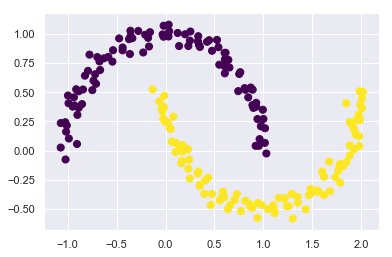

In [0]:
        from sklearn.cluster import SpectralClustering

        model = SpectralClustering(n_clusters=2, 
                                   affinity='nearest_neighbors', 
                                   assign_labels='kmeans')

        labels = model.fit_predict(X)

        plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
        plt.show()

Vemos que com essa abordagem de transformação de kernel, o k-means kernelizado é capaz de encontrar os limites não-lineares mais complicados entre os clusters.

# 4. Exemplos

Tendo cuidado com essas limitações do algoritmo, podemos usar k-means a nosso favor em uma ampla variedade de situações. Vamos agora dar uma olhada em alguns exemplos.

## 4.1. Exemplo 1: K-means em Dígitos

Para começar, vamos dar uma olhada na aplicação de k-means nos dados de dígitos simples. Vamos considerar uma parte do problema de reconhecimento óptico de caracteres: a identificação de dígitos escritos à mão. Na natureza, esse problema envolve localizar e identificar caracteres em uma imagem. Aqui vamos pegar um atalho e usar o conjunto de dígitos pré-formatados do Scikit-Learn, que está embutido na biblioteca.

Vamos usar a interface de acesso a dados do Scikit-Learn e dar uma olhada nesses dados:

In [0]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

Os dados das imagens são um array tridimensional: 1.797 amostras, cada uma consistindo em uma grade de 8×8 pixels. Vamos visualizar os primeiros cem destes:

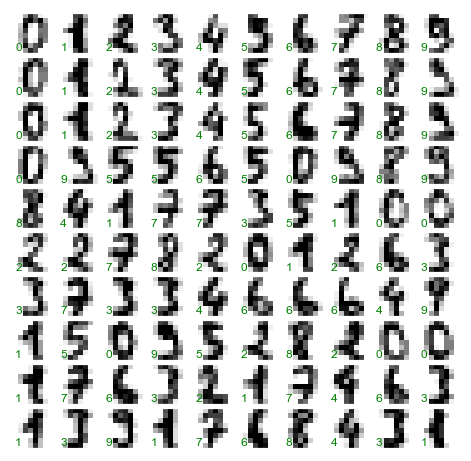

In [0]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]), transform=ax.transAxes, color='green')
plt.show()

O objeto `digits` também possui o campo `data` que contém os mesmos dados armazenados em `images`, porém na forma de um array unidimensional.

Aqui, tentaremos usar k-means para tentar identificar dígitos semelhantes sem usar as informações originais do rótulo; Isso pode ser semelhante a uma primeira etapa na extração de significado de um novo conjunto de dados sobre o qual você não possui informações de rótulo a priori.

Vamos começar carregando os dígitos e depois encontrando os clusters KMeans. Lembre-se que os dígitos consistem em 1.797 amostras com 64 características, onde cada uma das 64 características é o brilho de um pixel em uma imagem 8×8:

In [0]:
digits.data.shape

(1797, 64)

O clustering pode ser realizado como fizemos antes:

In [0]:
kmeans_dig = KMeans(n_clusters=10, random_state=0)
clusters = kmeans_dig.fit_predict(digits.data)
kmeans_dig.cluster_centers_.shape

(10, 64)

O resultado é 10 clusters em 64 dimensões. Observe que os centros dos cluster são pontos 64-dimensionais e podem ser interpretados como o dígito “típico” dentro do cluster. Vamos ver como são esses centros de cluster:

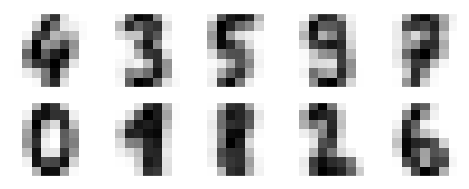

In [0]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans_dig.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

Vemos que, mesmo sem os rótulos, o KMeans é capaz de encontrar clusters cujos centros são dígitos reconhecíveis, com exceção, talvez, do 1 e do 8.

Como k-means não sabe nada sobre a identidade do cluster, os rótulos de 0 a 9 podem ser permutados. Podemos corrigir isso combinando cada rótulo de cluster aprendido com os rótulos verdadeiros encontrados neles:

In [0]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

Agora podemos verificar a precisão do nosso cluster não supervisionado na localização de dígitos semelhantes nos dados:

In [0]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7935447968836951

Apenas com um algoritmo k-means simples, descobrimos o agrupamento correto para 80% dos dígitos de entrada! Vamos verificar a matriz de confusão para isso:

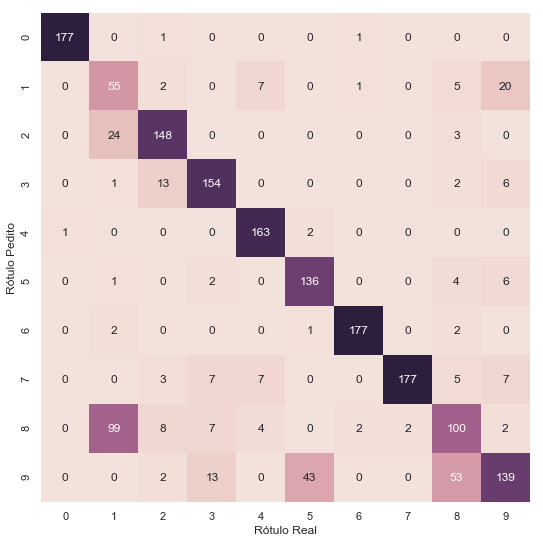

In [0]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(digits.target, labels)
plt.figure(figsize=(9,9))
cmap = sns.cubehelix_palette(light=0.9, as_cmap=True)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap=cmap,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('Rótulo Real')
plt.ylabel('Rótulo Pedito');

Uma **matriz de confusão**, também conhecida como *matriz de erro*, é um layout de tabela específico que permite a visualização do desempenho de um algoritmo. Cada linha da Matriz representa as instâncias em uma classe prevista, enquanto cada coluna representa as instâncias em uma classe real (ou vice-versa). O nome deriva do fato de que é fácil ver se o sistema está confundindo duas classes.

Como poderíamos esperar dos centros de clusters que visualizamos anteriormente, o principal ponto de confusão é entre os oito e o um. Mas isso ainda mostra que usando k-means, podemos essencialmente construir um classificador de dígitos sem referência a quaisquer rótulos conhecidos!

Apenas por diversão, vamos tentar levar isso ainda mais longe. Podemos usar o algoritmo de *incorporação de vizinho estocástico distribuído em t* &ndash; ou [t-distributed stochastic neighbor embedding](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding) (t-SNE) em inglês &ndash; para pré-processar os dados antes de executar k-means. O t-SNE é um algoritmo de incorporação não linear que é particularmente adepto da preservação de pontos dentro de clusters. 

O **t-SNE** é um algoritmo de aprendizado de máquina para visualização. É uma técnica de redução de dimensionalidade não linear bem adequada para embutir dados de alta dimensão para visualização em um espaço de baixa dimensão de duas ou três dimensões. Especificamente, ele modela cada objeto de alta dimensão por um ponto bidimensional ou tridimensional de forma que objetos similares sejam modelados por pontos próximos e objetos diferentes sejam modelados por pontos distantes com alta probabilidade.

Vamos ver como executar isso:

In [0]:
from sklearn.manifold import TSNE

# Projeção dos dados: esse passo pode levar vários segundos
tsne = TSNE(n_components=2, init='random', random_state=0)
digits_proj = tsne.fit_transform(digits.data)
digits_proj.shape

(1797, 2)

O que o t-SNE nos retornou foi uma projeção bidimencional dos dados. O algoritmos t-SNE garante que, com uma alta probabilidade, pontos próximo no espaço original (de 64 dimensões, neste caso) estarão próximos também no espaço bidimensional, e que pontos distantes no espaço original, estarão distantes no espaço bidimensional.

Vamos dar uma olhada em como ficou esta projeção dos dados.

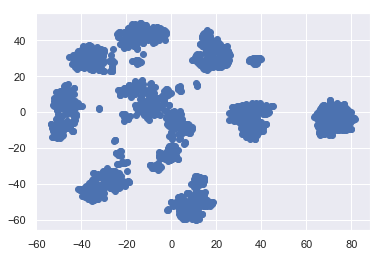

In [0]:
plt.scatter(digits_proj[:,0], digits_proj[:,1])
plt.show()

Agora vamos calcular novamente os clusteres com o k-means, e em seguida calcular a acurácia.

In [0]:
# Calcula os clusteres nos dados projetados
kmeans_dig = KMeans(n_clusters=10, random_state=0)
clusters = kmeans_dig.fit_predict(digits_proj)

# Corrige os rótulos
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

# Calcula a acurácia
accuracy_score(digits.target, labels)

0.9326655537006121

Isso é quase 92% de precisão de classificação sem usar os rótulos. Esse é o poder do aprendizado não supervisionado quando usado com cuidado: ele pode extrair informações do conjunto de dados que pode ser difícil de fazer à mão ou a olho nu.

Para fecharmos este exemplo, vamos calcular e plotar novamente a matriz de confusão, agora para os dados projetados.

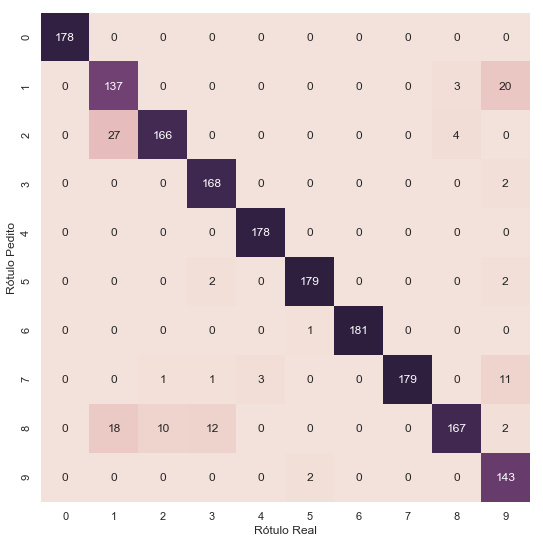

In [0]:
mat = confusion_matrix(digits.target, labels)
plt.figure(figsize=(9,9))
cmap = sns.cubehelix_palette(light=0.9, as_cmap=True)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap=cmap,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('Rótulo Real')
plt.ylabel('Rótulo Pedito');

Podemos ver que o “1” permanece a classe mais problemática, mas que o número de erros foi reduzido consideravelmente.

## 4.2. Exemplo 2: K-means para Compactação de Cores

Uma aplicação interessante de clusterização é a compactação de cores nas imagens. Por exemplo, imagine que você tenha uma imagem com milhões de cores. Na maioria das imagens, um grande número de cores não será usado e muitos dos pixels da imagem terão cores semelhantes ou até mesmo idênticas.

Por exemplo, considere a imagem mostrada na figura a seguir, que é do módulo `datasets` do Scikit-Learn (para isso funcionar, você terá que ter o pacote `pillow` instalado).

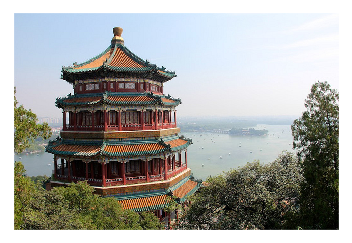

In [0]:
import warnings
warnings.simplefilter('ignore')  # Elimina alguns avisos

# Atenção: o pacote ``pillow`` precisa estar instalado
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china);

A imagem em si é armazenada em uma matriz tridimensional de tamanho `(height, width, RGB)`, contendo componentes vermelha/azul/verde como números inteiros de 0 a 255:

In [0]:
china.shape

(427, 640, 3)

Uma maneira de ver esse conjunto de pixels é como uma nuvem de pontos em um espaço de cores tridimensional. Vamos remodelar os dados para `[n_samples x n_features]` e redimensionar as cores para que fiquem entre 0 e 1:

In [0]:
data = china / 255.0 # usa escala 0...1
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

Podemos visualizar esses pixels neste espaço de cor, usando um subconjunto de 10000 pixels para eficiência:

In [0]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    
    # Seleciona uma amostra aleatórea de pixels
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

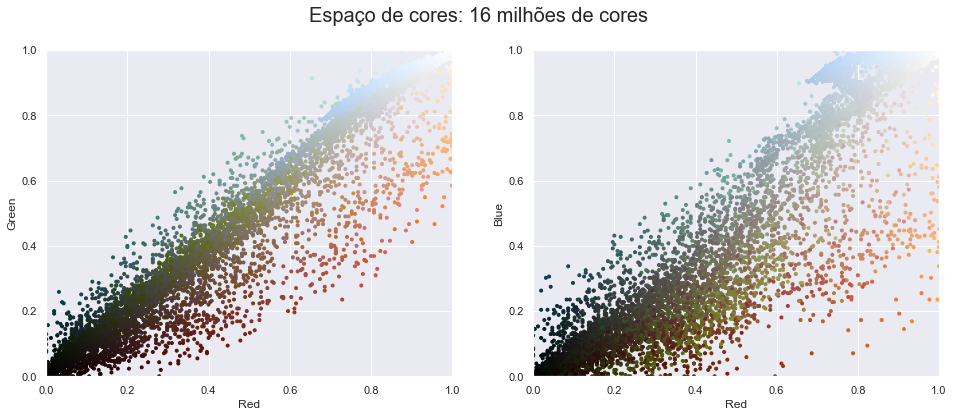

In [0]:
plot_pixels(data, title='Espaço de cores: 16 milhões de cores')

Agora, vamos reduzir esses 16 milhões de cores para apenas 16 cores, usando um clusterização com k-means no espaço de cores. Como estamos lidando com um conjunto de dados muito grande, usaremos a versão *mini batch* do k-means, que opera em subconjuntos dos dados para calcular o resultado muito mais rapidamente que o algoritmo padrão k-means (mas note que o KMeans padrão deveria funcionar também, apenas bem mais lento):

In [0]:
from sklearn.cluster import MiniBatchKMeans

kmeans = MiniBatchKMeans(16)
kmeans.fit(data)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
        init_size=None, max_iter=100, max_no_improvement=10, n_clusters=16,
        n_init=3, random_state=None, reassignment_ratio=0.01, tol=0.0,
        verbose=0)

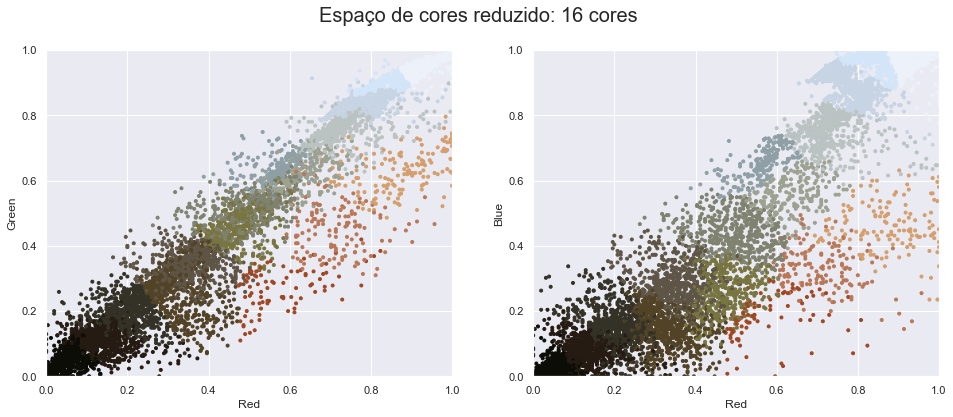

In [0]:
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]
plot_pixels(data, colors=new_colors, title="Espaço de cores reduzido: 16 cores")

O resultado é uma nova coloração dos pixels originais, onde cada pixel recebe a cor de seu centro de cluster mais próximo. Plotar essas novas cores no espaço da imagem, em vez de no espaço do pixel, nos mostra o efeito disso:

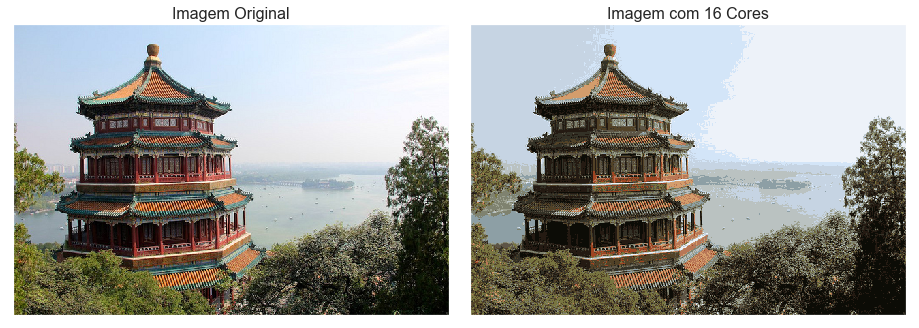

In [0]:
china_recolored = new_colors.reshape(china.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6), subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Imagem Original', size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('Imagem com 16 Cores', size=16);

Alguns detalhes certamente foram perdidos na imagem da direita, mas a imagem geral ainda é facilmente reconhecível. Esta imagem à direita alcança um fator de compressão de cerca de 1 milhão! Embora esta seja uma aplicação interessante de k-means, há certamente uma maneira melhor de compactar informações em imagens. Mas o exemplo mostra o poder de pensar fora da caixa com métodos de clusterização como k-means.

# 5. Escolhendo o Valor de K

Em algumas aplicações, o conhecimento do domínio dos dados permite inferir um valor adequado para o número de clusteres, i.e., o valor de $k$, como no caso do Exemplo 1 acima, onde sabiamos que deveriam haver 10 clusteres pois este é o número de dígitos que desejávamos identificar. 

Em outras aplicações, o número de clusteres pode ser variável de acordo com a necessidade, sem que uma escolha ou outra inviabilize a aplicação. No caso do Exemplo 2 acima, a escolha de 16 clusteres para agrupar as cores foi arbitrária, poderíamos ter escolhido qualquer outro número de clusteres &ndash; conforme a quantidade de cores finais que desejassemos &ndash; e o processo teria funcionado da mesma foram, talvez com uma imagem final com mais ou menos granularidade conforme a quantidade de clusteres especificados.

Entretanto, existem aplicações para as quais o conhecimento do domínio dos dados não nos permite inferir um valor para $k$ e que, ao mesmo tempo, o valor de $k$ pode indicar o sucesso ou não da análise de dados. Nestes casos é útil ter alguma técnica para tentar determinar um valor *ótimo* para $k$ &ndash; ou o mais próximo disso possível. Existem duas técnicas que são mais comumente utilizadas para esse fim:

1. O Método do Cotovelo
2. O Método da Silhueta

Ambos os métodos são computacionalmente intensivos.

## 5.1. Método do Cotovelo

O **Método do Cotovelo** é um método de interpretação e validação de consistência dentro da análise de clusteres, projetado para ajudar a encontrar o número apropriado de clusteres em um conjunto de dados.

Esse método examina a porcentagem de variação explicada como uma função do número de clusterse: deve-se escolher um número de clusters para que a adição de outro cluster não forneça uma modelagem muito melhor dos dados. Mais precisamente, se alguém traça a porcentagem de variância explicada pelos clusters em relação ao número de clusters, os primeiros clusters adicionarão muita informação (explicam muita variação), mas em algum ponto o ganho marginal cairá, dando um ângulo no gráfico. O número de clusters é escolhido neste ponto, daí o “critério do cotovelo”. Esse “cotovelo” nem sempre pode ser identificado sem ambiguidade. A porcentagem de variância explicada é a razão entre a variância entre grupos e a variância total, também conhecida como [F-Test](https://en.wikipedia.org/wiki/F-test).

A implementação do `KMeans` do Scikit-Learn já disponibiliza uma medida de variância para o modelo gerado através do atributo `inertia_`, que contém a soma do quadrado das distâncias das amostras para o centro do cluster mais próximo. Dividindo-se esta soma pelo número de amostra conseguimos a variância média. Essa estatística pode ser utilizada para construir o gráfico do Método do Cotovelo.

Vamos ilustrar o Método do Cotovelo abaixo com o uso de alguns dados randômicos.

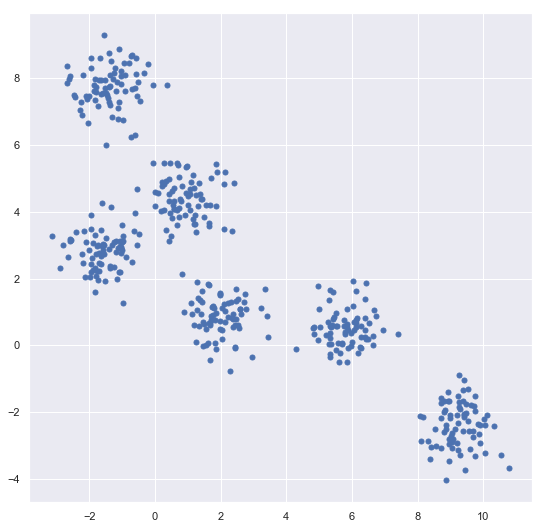

In [0]:
# Geração de 450 amostras aleatórias em 6 clusteres
X, y_true = make_blobs(n_samples=450, centers=6, cluster_std=0.60, random_state=0)

plt.figure(figsize=(9,9))
plt.scatter(X[:, 0], X[:, 1], s=25);
plt.show()

In [0]:
ks = np.arange(2, 20)
scores = np.array([KMeans(n_clusters=k).fit(X).inertia_/len(X) for k in ks])
scores

array([8.14265154, 4.5726093 , 2.6158859 , 1.43908538, 0.69436496,
       0.64160724, 0.59196937, 0.55696065, 0.53168794, 0.4801988 ,
       0.44006306, 0.41671954, 0.39117469, 0.36133058, 0.33725868,
       0.31322586, 0.3038689 , 0.27549999])

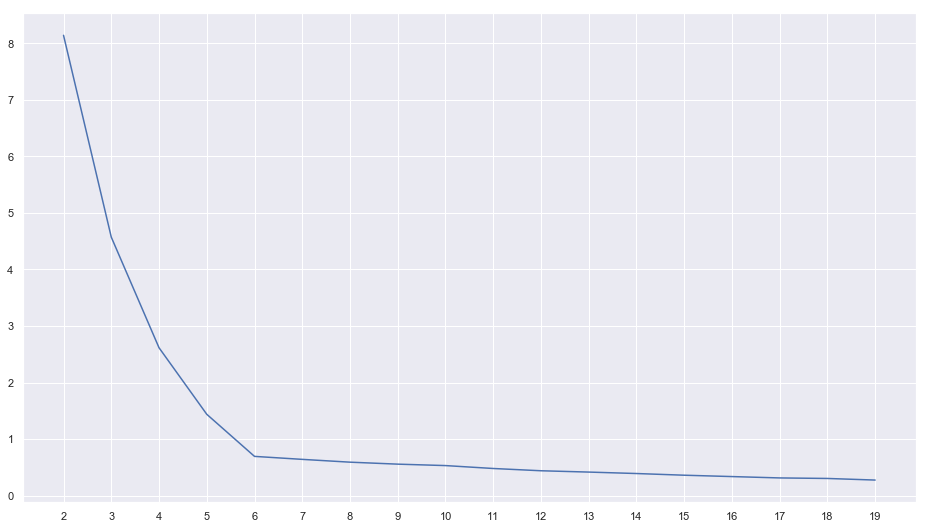

In [0]:
plt.figure(figsize=(16,9))
plt.xticks(ks)
plt.plot(ks, scores)
plt.show()

Neste exemplo é possível perceber claramente que exite uma quebra, i.e., o “cotovelo”, na posição 6. O que indica que este é o valor ideal pra o número de clusteres.

## 5.2. Método da Silhueta

O **Método da Silhueta** é um método de interpretação e validação de consistência dentro de clusters de dados. A técnica fornece uma representação gráfica sucinta de quão bem cada objeto está dentro de seu cluster.

O valor da silhueta é uma medida de como um objeto é semelhante ao seu próprio cluster (coesão) comparado a outros clusters (separação). A silhueta varia de −1 a +1, onde um valor alto indica que o objeto é bem compatível com seu próprio cluster e mal combinado com os clusters vizinhos. Se a maioria dos objetos tiver um valor alto, a configuração de cluster será apropriada. Se muitos pontos tiverem um valor baixo ou negativo, a configuração de cluster poderá ter muitos ou poucos clusters.

A silhueta pode ser calculada com qualquer métrica de distância, como a distância euclidiana ou a distância de Manhattan.

O pacote `sklearn.metrics` disponibiliza duas funções para a aplicação do Método de Silhueta. A função `silhouette_samples` calcula o coeficiente de silhueta [-1..+1] para amostras individuais. Já a função `silhouette_score` calcula o coeficiente de silhueta médito para todo o conjunto de dados. Quanto maior o valor médio do coeficiente de sulhueta, mas “ajustado” está o cluster.

O exemplo abaixo ilustra o uso do Método de Silhueta para determinar o número ótimo de clusteres. Utilizaremos o mesmo conjunto de dados da seção anterio.

In [0]:
from sklearn.metrics import silhouette_score

ks = np.arange(2,20)
scores = []

for k in ks:
    km = KMeans(n_clusters=k).fit(X)
    preds = km.predict(X)
    centers = km.cluster_centers_
    score = silhouette_score(X, preds, metric='euclidean')
    print("For n_clusters = %d, silhouette score is %f." % (k, score))
    scores.append(score)

scores

For n_clusters = 2, silhouette score is 0.594046.
For n_clusters = 3, silhouette score is 0.548418.
For n_clusters = 4, silhouette score is 0.566493.
For n_clusters = 5, silhouette score is 0.635516.
For n_clusters = 6, silhouette score is 0.698592.
For n_clusters = 7, silhouette score is 0.639026.
For n_clusters = 8, silhouette score is 0.570475.
For n_clusters = 9, silhouette score is 0.505089.
For n_clusters = 10, silhouette score is 0.438589.
For n_clusters = 11, silhouette score is 0.383809.
For n_clusters = 12, silhouette score is 0.329491.
For n_clusters = 13, silhouette score is 0.337128.
For n_clusters = 14, silhouette score is 0.343464.
For n_clusters = 15, silhouette score is 0.351197.
For n_clusters = 16, silhouette score is 0.359781.
For n_clusters = 17, silhouette score is 0.355792.
For n_clusters = 18, silhouette score is 0.350043.
For n_clusters = 19, silhouette score is 0.358969.


[0.5940456863081257,
 0.5484182501109162,
 0.5664932485296558,
 0.6355163170448729,
 0.6985918669837237,
 0.6390261376879506,
 0.5704754505827376,
 0.50508858070706,
 0.43858941138969665,
 0.3838094568857404,
 0.32949070670795627,
 0.33712837341416985,
 0.3434638342703926,
 0.351197197218388,
 0.359781123489683,
 0.3557924935243817,
 0.3500427566448463,
 0.358969065374436]

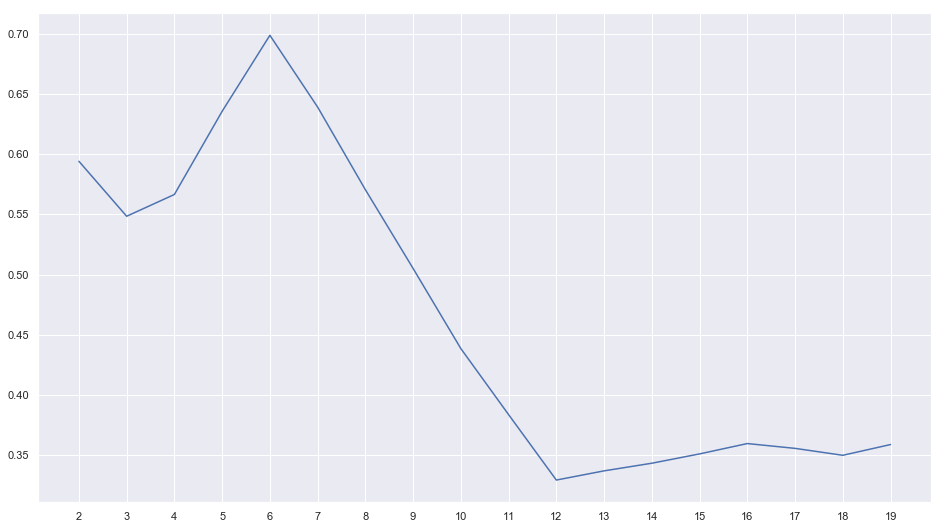

In [0]:
plt.figure(figsize=(16,9))
plt.xticks(ks)
plt.plot(ks, scores)
plt.show()

Podemos ver que o maior valor do Coeficiente de Silhueta ocorre para 6 clusteres. Como esperávamos.